In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import os

import utils

**Load data:**

In [2]:
path = os.getcwd()
data_era5 = xr.open_dataset(path + "/era5_monthly.nc")

In [3]:
data_nao = utils.get_nao().resample(time="MS").mean()

In [4]:
data = xr.merge([data_era5, data_nao])

In [5]:
data["msl_anom"] = (
    data.msl.groupby("time.month") - data.msl.groupby("time.month").mean()
)

In [6]:
data

<xarray.Dataset>
Dimensions:    (latitude: 73, longitude: 144, time: 867)
Coordinates:
  * time       (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2022-03-01
  * longitude  (longitude) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * latitude   (latitude) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
    month      (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 5 6 7 8 9 10 11 12 1 2 3
Data variables:
    t2m        (time, latitude, longitude) float32 nan nan nan ... nan nan nan
    msl        (time, latitude, longitude) float32 nan nan nan ... nan nan nan
    tcc        (time, latitude, longitude) float32 nan nan nan ... nan nan nan
    tp         (time, latitude, longitude) float32 nan nan nan ... nan nan nan
    NAO        (time) float64 0.4635 0.4207 0.008387 0.2394 ... 0.5725 nan nan
    msl_anom   (time, latitude, longitude) float32 nan nan nan ... nan nan nan
Attributes:
    Conventions:  CF-1.6
    history:      2022-04-19 07:47:40 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

**NAO timeseries**:

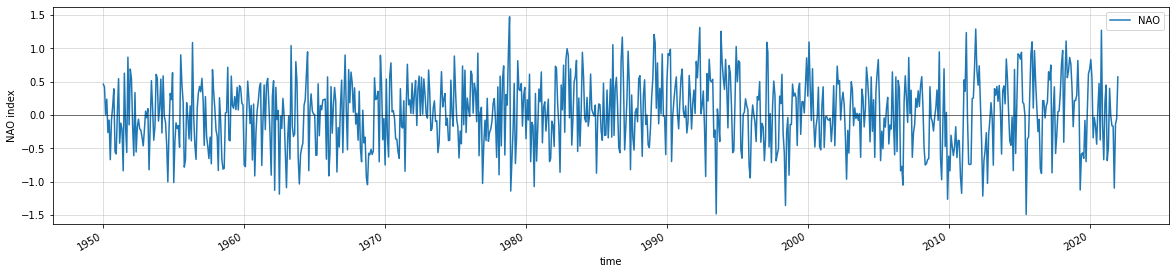

In [8]:
# data_enso.enso.time.values
data.NAO.plot(figsize=(20, 4), label="NAO")
plt.ylabel("NAO index")
plt.grid(alpha=0.5)
plt.axhline(color="k", lw=0.5)
plt.legend()
plt.show()

**Filter a dataset:**

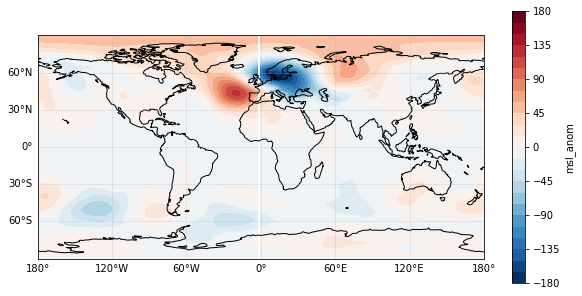

In [11]:
msl_anom_when_muc_is_wet =  data.where(data.tp.sel(longitude=10, latitude=47.5) > 0.005, drop=True).msl_anom
utils.plot_dataarray_map(msl_anom_when_muc_is_wet.mean("time"), levels=30)
plt.show()

In [12]:
data_low_nao = data.where((data.NAO < -1), drop = True)
data_high_nao = data.where((data.NAO > 1), drop = True)

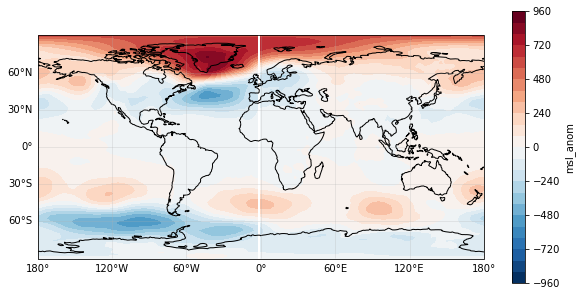

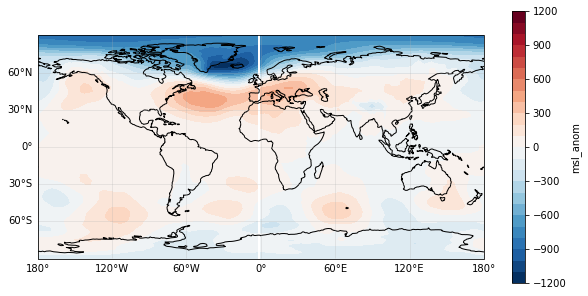

In [13]:
utils.plot_dataarray_map(data_low_nao.msl_anom.mean(dim = 'time'), levels = 30)
utils.plot_dataarray_map(data_high_nao.msl_anom.mean(dim = 'time'), levels = 30)

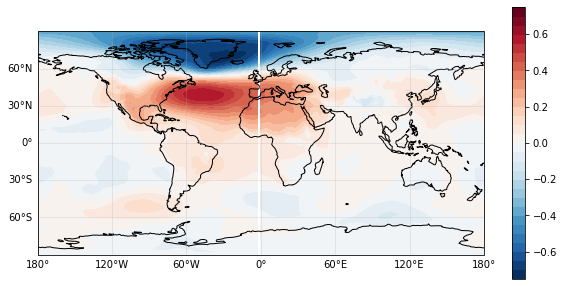

In [14]:
utils.plot_dataarray_map(xr.corr(data.msl_anom, data.NAO, dim = 'time'), levels = 30)

C:\Users\maxse\anaconda3\lib\site-packages\xarray\core\dataarray.py:3205: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
C:\Users\maxse\anaconda3\lib\site-packages\xarray\core\dataarray.py:3205: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(


minimum correlation value:-0.5864238879347742 at coordinates: [62.5 30. ] and [30.  62.5]


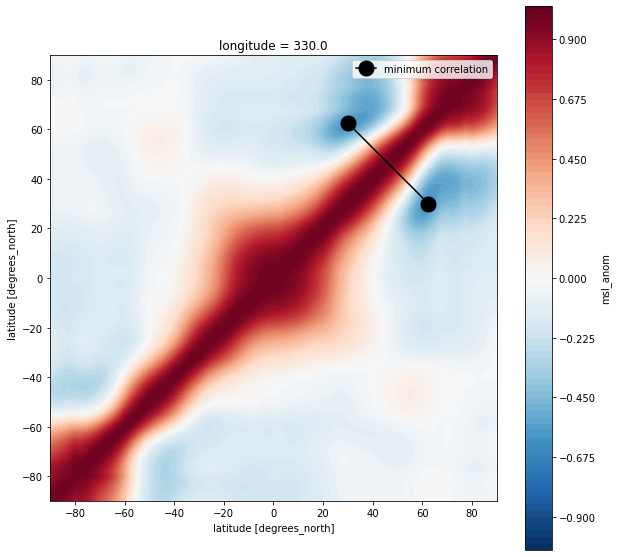

In [24]:
da_fixed_lon = data.sel(longitude =330)
                       
corr_mat = xr.corr(da_fixed_lon.msl_anom ,da_fixed_lon.msl_anom.rename(latitude="response_latitude"),dim="time")

corr_mat_min_pos = corr_mat.idxmin(dim = 'latitude')
corr_mat_min = np.min(corr_mat)

print('minimum correlation value:' + str(corr_mat_min.values) + ' at coordinates: ' + str(corr_mat.where(corr_mat == corr_mat_min, drop = True).response_latitude.values) + ' and ' + str(corr_mat.where(corr_mat == corr_mat_min, drop = True).response_latitude.roll(response_latitude = -1).values))

corr_mat.plot.contourf (figsize = (10,10), levels = 100)
plt.plot(corr_mat.where(corr_mat == corr_mat_min, drop = True).response_latitude, corr_mat.where(corr_mat == corr_mat_min, drop = True).response_latitude.roll(response_latitude = -1), marker ='o', markersize =15, color = 'k', label = 'minimum correlation')
plt.legend()
plt.gca().set_aspect("equal") 

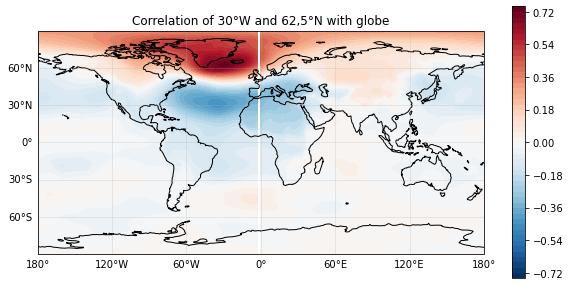

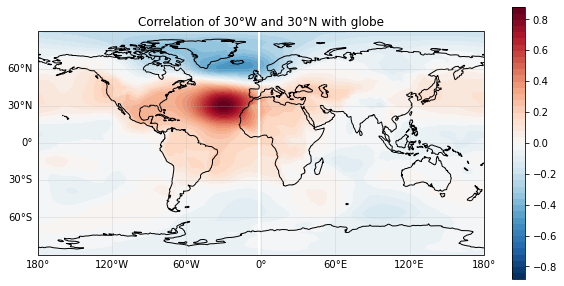

In [22]:
corr_gp_global = xr.corr(data.msl_anom, da_fixed_lon.msl.sel(latitude=62.5), dim = 'time')
utils.plot_dataarray_map(corr_gp_global, levels = 50)
plt.title('Correlation of 30°W and 62,5°N with globe')
plt.show()

corr_gp_global = xr.corr(data.msl_anom, da_fixed_lon.msl.sel(latitude=30), dim = 'time')
utils.plot_dataarray_map(corr_gp_global, levels = 50)
plt.title('Correlation of 30°W and 30°N with globe')
plt.show()